In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Import data into Python environment

In [15]:
df = pd.read_csv("Comcast_telecom_complaints_data.csv")

In [16]:
df.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
0,250635,Comcast Cable Internet Speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No
1,223441,Payment disappear - service got disconnected,04-08-15,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No
2,242732,Speed and Service,18-04-15,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes
4,307175,Comcast not working and no service to boot,26-05-15,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No


In [17]:
df["date_index"] = df["Date_month_year"] + " " + df["Time"]
df["date_index"] = pd.to_datetime(df["date_index"])
df["Date_month_year"] = pd.to_datetime(df["Date_month_year"])

In [18]:
df = df.set_index(df["date_index"])

In [19]:
df.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,date_index
date_index,,,,,,,,,,,,
2015-04-22 15:53:50,250635,Comcast Cable Internet Speeds,22-04-15,2015-04-22,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,2015-04-22 15:53:50
2015-08-04 10:22:56,223441,Payment disappear - service got disconnected,04-08-15,2015-08-04,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,2015-08-04 10:22:56
2015-04-18 09:55:47,242732,Speed and Service,18-04-15,2015-04-18,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,2015-04-18 09:55:47
2015-07-05 11:59:35,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,2015-07-05,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,2015-07-05 11:59:35
2015-05-26 13:25:26,307175,Comcast not working and no service to boot,26-05-15,2015-05-26,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No,2015-05-26 13:25:26


In [20]:
df['Date_month_year'].value_counts()

2015-06-24    218
2015-06-23    190
2015-06-25     98
2015-06-26     55
2015-06-30     53
             ... 
2015-05-17      7
2015-12-05      7
2015-05-04      6
2015-11-04      5
2015-03-05      5
Name: Date_month_year, Length: 91, dtype: int64

## Trend chart for the number of complaints at daily granularity levels

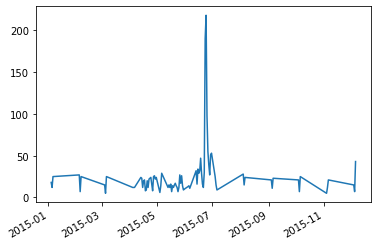

In [21]:
df["Date_month_year"].value_counts().plot(x="Date_month_year");

## Trend chart for the number of complaints at monthly granularity levels

In [22]:
f = df.groupby(pd.Grouper(freq="M")).size()

In [23]:
f

date_index
2015-01-31      55
2015-02-28      59
2015-03-31      45
2015-04-30     375
2015-05-31     317
2015-06-30    1046
2015-07-31      49
2015-08-31      67
2015-09-30      55
2015-10-31      53
2015-11-30      38
2015-12-31      65
Freq: M, dtype: int64

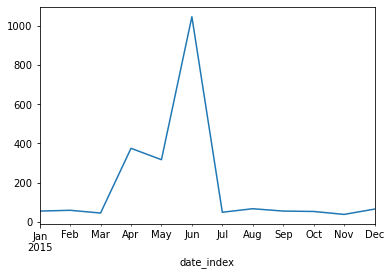

In [24]:
f.plot();

In [26]:
df["Final_Status"] = df["Status"].apply(lambda status: "Open" if status in ["Open", "Pending"] else "Closed")

In [27]:
df.head(3)

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,date_index,Final_Status
date_index,,,,,,,,,,,,,
2015-04-22 15:53:50,250635,Comcast Cable Internet Speeds,22-04-15,2015-04-22,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,2015-04-22 15:53:50,Closed
2015-08-04 10:22:56,223441,Payment disappear - service got disconnected,04-08-15,2015-08-04,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,2015-08-04 10:22:56,Closed
2015-04-18 09:55:47,242732,Speed and Service,18-04-15,2015-04-18,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,2015-04-18 09:55:47,Closed


In [28]:
df.groupby(["State"]).size()

State
Alabama                  26
Arizona                  20
Arkansas                  6
California              220
Colorado                 80
Connecticut              12
Delaware                 12
District Of Columbia     16
District of Columbia      1
Florida                 240
Georgia                 288
Illinois                164
Indiana                  59
Iowa                      1
Kansas                    2
Kentucky                  7
Louisiana                13
Maine                     5
Maryland                 78
Massachusetts            61
Michigan                115
Minnesota                33
Mississippi              39
Missouri                  4
Montana                   1
Nevada                    1
New Hampshire            12
New Jersey               75
New Mexico               15
New York                  6
North Carolina            3
Ohio                      3
Oregon                   49
Pennsylvania            130
Rhode Island              1
South Carolina

In [89]:
df.groupby(["State"]).size().sort_values(ascending=False).to_frame().reset_index().rename({0: "Count"}, axis=1)

,State,Count
0,Georgia,288
1,Florida,240
2,California,220
3,Illinois,164
4,Tennessee,143
5,Pennsylvania,130
6,Michigan,115
7,Washington,98
8,Colorado,80
9,Maryland,78


In [102]:
status_complaint = df.groupby(["State", "Final_Status"]).size().unstack().fillna(0)

In [103]:
status_complaint

Final_Status,Closed,Open
State,,
Alabama,17.0,9.0
Arizona,14.0,6.0
Arkansas,6.0,0.0
California,159.0,61.0
Colorado,58.0,22.0
Connecticut,9.0,3.0
Delaware,8.0,4.0
District Of Columbia,14.0,2.0
District of Columbia,1.0,0.0


<AxesSubplot:xlabel='State'>

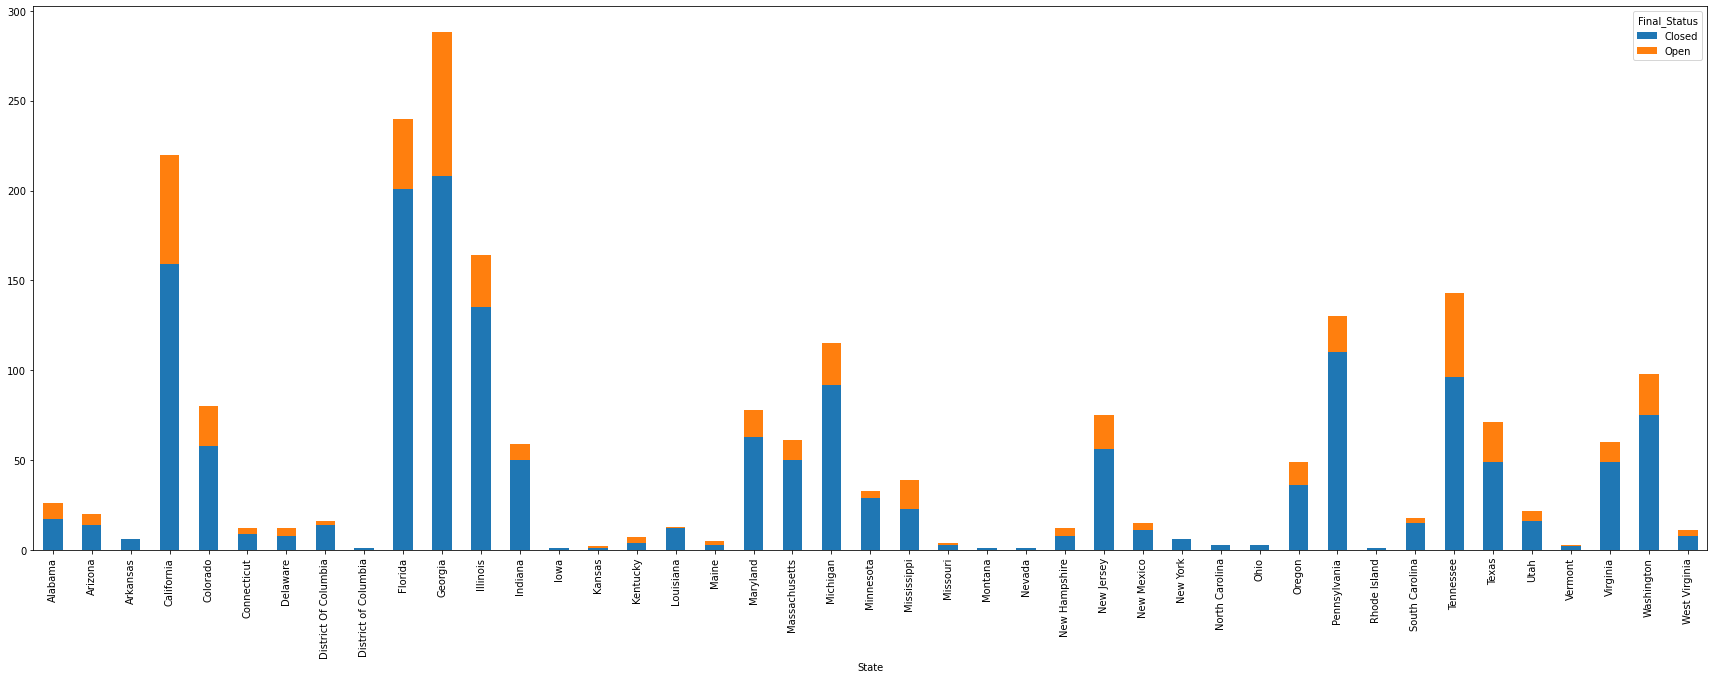

In [111]:
status_complaint.plot.bar(stacked=True, figsize=(30, 10))

In [112]:
status_complaint.max()

Final_Status
Closed    208.0
Open       80.0
dtype: float64

In [123]:
df.groupby(["State"]).size().sort_values(ascending=False).to_frame().reset_index().rename({0:"Count"}, axis=1).max()

State    West Virginia
Count              288
dtype: object

In [124]:
df.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,Complaint_Year,Complaint_Month,Complaint_Day,date_index,Final_Status
date_index,,,,,,,,,,,,,,,,
2015-04-22 15:53:50,250635,Comcast Cable Internet Speeds,2015-04-22,2015-04-22,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,2015,4,22,2015-04-22 15:53:50,Closed
2015-08-04 10:22:56,223441,Payment disappear - service got disconnected,2015-04-08,2015-08-04,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,2015,4,8,2015-08-04 10:22:56,Closed
2015-04-18 09:55:47,242732,Speed and Service,2015-04-18,2015-04-18,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,2015,4,18,2015-04-18 09:55:47,Closed
2015-07-05 11:59:35,277946,Comcast Imposed a New Usage Cap of 300GB that ...,2015-05-07,2015-07-05,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,2015,5,7,2015-07-05 11:59:35,Open
2015-05-26 13:25:26,307175,Comcast not working and no service to boot,2015-05-26,2015-05-26,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No,2015,5,26,2015-05-26 13:25:26,Closed


In [29]:
# df.groupby(["Final_Status"]).mean().unstack().reset_index().fillna(0)
df.groupby('State').Final_Status.apply(lambda x: (x == 'Open').mean()).to_frame().reset_index()

,State,Final_Status
0,Alabama,0.346154
1,Arizona,0.300000
2,Arkansas,0.000000
3,California,0.277273
4,Colorado,0.275000
5,Connecticut,0.250000
6,Delaware,0.333333
7,District Of Columbia,0.125000
8,District of Columbia,0.000000
9,Florida,0.162500


In [259]:
df.groupby('State').Final_Status.apply(lambda x: (x == 'Open').mean()).to_frame().reset_index().max()

State           West Virginia
Final_Status              0.5
dtype: object

In [260]:
df["isSolved"] = df["Final_Status"].apply(lambda status: 1 if status == 'Open' else 0 )

In [261]:
df.shape

(2224, 18)

In [266]:
df.reset_index(drop=True, inplace=True)

In [271]:
df.head(2)

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,Complaint_Year,Complaint_Month,Complaint_Day,date_index,Final_Status,percentile,isSolved
0,250635,Comcast Cable Internet Speeds,2015-04-22,2015-04-22,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,2015,4,22,2015-04-22 15:53:50,Closed,0,0
1,223441,Payment disappear - service got disconnected,2015-04-08,2015-08-04,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,2015,4,8,2015-08-04 10:22:56,Closed,0,0


In [300]:
# df.groupby(["State"]).isSolved.sum()
percentage_df = df.groupby(["State", "isSolved"]).size().unstack().reset_index(drop=True).rename({0:"Total"}, axis=1).rename({1:"openStatus"}, axis=1).fillna(0)

In [299]:
# percentage_df.reset_index(drop=True)
percentage_df.head(2)

isSolved,Total,openStatus
0,17.0,9.0
1,14.0,6.0


In [288]:
percentage_df['percentage'] = (percentage_df["openStatus"]*100)/percentage_df["Total"]

In [289]:
percentage_df.reset_index(drop=True)

isSolved,Total,openStatus,percentage
0,17.0,9.0,52.941176
1,14.0,6.0,42.857143
2,6.0,0.0,0.000000
3,159.0,61.0,38.364780
4,58.0,22.0,37.931034
5,9.0,3.0,33.333333
6,8.0,4.0,50.000000
7,14.0,2.0,14.285714
8,1.0,0.0,0.000000
9,201.0,39.0,19.402985


In [295]:
percentage_df["percentage"].to_frame().max()

percentage    100.0
dtype: float64

In [297]:
percentage_df.head()

isSolved,Total,openStatus,percentage
0,17.0,9.0,52.941176
1,14.0,6.0,42.857143
2,6.0,0.0,0.000000
3,159.0,61.0,38.364780
4,58.0,22.0,37.931034
